<a href="https://colab.research.google.com/github/anshupandey/Machine_Learning_Training/blob/master/transfer_learning_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/image_data.zip

--2020-01-26 14:55:13--  https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/image_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20160500 (19M) [application/zip]
Saving to: ‘image_data.zip’

image_data.zip      100%[===================>]  19.23M  43.6MB/s    in 0.4s    

2020-01-26 14:55:13 (43.6 MB/s) - ‘image_data.zip’ saved [20160500/20160500]



In [0]:
!unzip image_data.zip

Archive:  image_data.zip
  inflating: image_data/car3.png     
  inflating: image_data/cat.jpeg     
  inflating: image_data/cat2.jpg     
   creating: image_data/data/
   creating: image_data/data/dogs/
  inflating: image_data/data/dogs/dog.1.jpg  
  inflating: image_data/data/dogs/dog.10.jpg  
  inflating: image_data/data/dogs/dog.100.jpg  
  inflating: image_data/data/dogs/dog.101.jpg  
  inflating: image_data/data/dogs/dog.102.jpg  
  inflating: image_data/data/dogs/dog.103.jpg  
  inflating: image_data/data/dogs/dog.104.jpg  
  inflating: image_data/data/dogs/dog.105.jpg  
  inflating: image_data/data/dogs/dog.106.jpg  
  inflating: image_data/data/dogs/dog.107.jpg  
  inflating: image_data/data/dogs/dog.108.jpg  
  inflating: image_data/data/dogs/dog.109.jpg  
  inflating: image_data/data/dogs/dog.11.jpg  
  inflating: image_data/data/dogs/dog.110.jpg  
  inflating: image_data/data/dogs/dog.111.jpg  
  inflating: image_data/data/dogs/dog.112.jpg  
  inflating: image_data/data/dog

In [0]:
main_folder = 'image_data/data'
import os

In [0]:
names = os.listdir(main_folder)
names

['horses', 'dogs', 'Humans']

In [0]:
from tensorflow.keras.preprocessing import image

In [0]:
x = []
y = []
for folder_name in names:
  img_list = os.listdir(main_folder+'/'+folder_name)
  for img_name in img_list:
    img = image.load_img(main_folder+'/'+folder_name+'/'+img_name,target_size=(200,200))
    img = image.img_to_array(img)
    x.append(img)
    y.append(names.index(folder_name))



In [0]:
import numpy as np
x = np.array(x)
x.shape

(606, 200, 200, 3)

In [0]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y.shape

(606, 3)

In [0]:
# Developing Deep Learning models for training image classafication
from tensorflow.keras import models,layers

model = models.Sequential() # creating an empty neural network
model.add(layers.Conv2D(10,(5,5),input_shape=(200,200,3),activation='relu'))
model.add(layers.Conv2D(20,(5,5),activation='relu'))
model.add(layers.Conv2D(30,(5,5),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(40,(5,5),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x,y,epochs=10,batch_size=32,validation_split=0.2,shuffle=True)

Train on 484 samples, validate on 122 samples
Epoch 1/10
484/484 [==============================] - 10s 21ms/sample - loss: 189.3481 - acc: 0.3843 - val_loss: 1.1556 - val_acc: 0.2541
Epoch 2/10
484/484 [==============================] - 2s 3ms/sample - loss: 1.0140 - acc: 0.6219 - val_loss: 2.3194 - val_acc: 0.2623
Epoch 3/10
484/484 [==============================] - 2s 3ms/sample - loss: 0.4259 - acc: 0.8409 - val_loss: 2.3359 - val_acc: 0.4016
Epoch 4/10
484/484 [==============================] - 1s 3ms/sample - loss: 0.2420 - acc: 0.9442 - val_loss: 3.7271 - val_acc: 0.4180
Epoch 5/10
484/484 [==============================] - 2s 3ms/sample - loss: 0.1162 - acc: 0.9669 - val_loss: 3.2954 - val_acc: 0.4262
Epoch 6/10
484/484 [==============================] - 2s 3ms/sample - loss: 0.0548 - acc: 0.9917 - val_loss: 7.6676 - val_acc: 0.3770
Epoch 7/10
484/484 [==============================] - 2s 3ms/sample - loss: 0.0116 - acc: 1.0000 - val_loss: 7.1805 - val_acc: 0.3689
Epoch 8/10
4

In [0]:
img = image.load_img('/content/dog.jpg',target_size=(200,200))
img = image.img_to_array(img)
model.predict_classes(img.reshape(1,200,200,3))

array([1])

In [0]:
names[1]

'dogs'

# Transfer Learning

In [0]:
# loading a pretrained neural network with last layer - just to analyse the model

In [0]:
## l
from tensorflow.keras.applications import resnet50
model = resnet50.ResNet50(weights='imagenet')
model.summary()


In [0]:
input_layer = layers.Input(shape=(200,200,3))
model = resnet50.ResNet50(weights='imagenet',include_top=False,input_tensor=input_layer)
model.summary()


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [0]:
last_layer = model.output
fl = layers.Flatten()(last_layer)
output_layer = layers.Dense(3,activation='softmax')(fl)

new_model = models.Model(inputs = input_layer,outputs=output_layer)
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [0]:
# freezing all layers except last layer because all layers are already trained and
# we do not want to retrain them, we just want to train last layer
for layer in new_model.layers[:-1]:
  layer.trainable=False

In [0]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [0]:
x = []
y = []
for folder_name in names:
  img_list = os.listdir(main_folder+'/'+folder_name)
  for img_name in img_list:
    img = image.load_img(main_folder+'/'+folder_name+'/'+img_name,target_size=(200,200))
    img = image.img_to_array(img)
    img = resnet50.preprocess_input(img)
    x.append(img)
    y.append(names.index(folder_name))

x = np.array(x)
y = to_categorical(y)

In [0]:
new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
new_model.fit(x,y,epochs=10,batch_size=32,shuffle=True,validation_split=0.2)

Train on 484 samples, validate on 122 samples
Epoch 1/10
484/484 [==============================] - 6s 12ms/sample - loss: 2.6303 - acc: 0.8450 - val_loss: 0.4337 - val_acc: 0.9754
Epoch 2/10
484/484 [==============================] - 2s 4ms/sample - loss: 0.0827 - acc: 0.9917 - val_loss: 4.2236 - val_acc: 0.9016
Epoch 3/10
484/484 [==============================] - 2s 4ms/sample - loss: 0.0050 - acc: 0.9979 - val_loss: 4.3469 - val_acc: 0.8934
Epoch 4/10
484/484 [==============================] - 2s 4ms/sample - loss: 8.5720e-04 - acc: 1.0000 - val_loss: 3.1811 - val_acc: 0.9344
Epoch 5/10
484/484 [==============================] - 2s 4ms/sample - loss: 1.7340e-06 - acc: 1.0000 - val_loss: 2.7843 - val_acc: 0.9344
Epoch 6/10
484/484 [==============================] - 2s 4ms/sample - loss: 0.0112 - acc: 0.9979 - val_loss: 2.9212 - val_acc: 0.9344
Epoch 7/10
484/484 [==============================] - 2s 4ms/sample - loss: 0.1028 - acc: 0.9917 - val_loss: 1.7378 - val_acc: 0.9590
Epoch 8

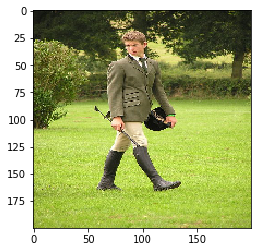

In [0]:
img = image.load_img('/content/man.jpg',target_size=(200,200))
img = image.img_to_array(img)
import matplotlib.pyplot as plt
plt.imshow(img.astype('int32'))
plt.show()

In [0]:
img = resnet50.preprocess_input(img)
names[np.argmax(new_model.predict(img.reshape(1,200,200,3)))]

'Humans'

In [0]:
new_model.predict(img.reshape(1,200,200,3))

array([[1.0000000e+00, 0.0000000e+00, 1.5270003e-38]], dtype=float32)